In [1]:
# ETHZ model: exploring the boosted model data
#
#
# Original: vikki.thompson 19/06/2023
# Last Editted 23/01/2024

In [2]:
### Load neccessary libraries
import subprocess
import numpy as np
import iris
import sys
import matplotlib.pyplot as plt
sys.path.append('/usr/people/thompson/WP1/boosting')
import functions_boosting as gboost
sys.path.append('/usr/people/thompson/WP1')
import functions_get_data as gdata
import functions_plot_data as pdata
import iris.coord_categorisation as icc
from iris.coord_categorisation import add_season_membership
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
import cartopy as cart
import glob
import matplotlib.cm as mpl_cm
import sys
import scipy.stats as sps
from scipy.stats import genextreme as gev
import random
import scipy.io
import xarray as xr
import netCDF4 as nc
import iris.coords
import iris.util
from iris.util import equalise_attributes
from iris.util import unify_time_units
from scipy.stats.stats import pearsonr
import calendar
import cartopy.feature as cf
import itertools
from cartopy.mpl.patch import geos_to_path
from matplotlib.collections import LineCollection
import matplotlib.gridspec as gridspec
plt.ion(); plt.show()

/tmp/ipykernel_496584/2294065922.py:31: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
## Variables
R1 = [70, 30, 30, -30] # analog region
date = [2021, 'Jul', 14] # event date

## Inputs
plotdate = '20070825' # '20090829' '20160801'
rain_region = [52, 48, 9, 4]

In [4]:
def rainfall_max_mean(plotdate, var, region):
    ''' This function...
    plotdate = YYYYMMDD, as string
    var = e.g. tp, cp, lp, as string
    '''
    fields_list = iris.load('/net/pc200023/nobackup/users/thompson/ETHZ/boosted_cubes/'+var+'_'+plotdate+'.nc')
    fields_list.sort(key=lambda cube: cube.coord('startdate').points) # Fix random cubelist ordering
    rain_region_str = str(region[1])+'-'+str(region[0])+'N; '+str(region[3])+'-'+str(region[2])+'E'
    rain_mean = []; rain_max = []
    for each in fields_list:
        rain = gboost.extract_region(each, region)
        rain_mean.append(rain.collapsed(['latitude', 'longitude'], iris.analysis.MEAN).data)
        rain_max.append(rain.collapsed(['latitude', 'longitude'], iris.analysis.MAX).data)
    for i, each in enumerate(rain_mean): ## BAD FIX FOR MISSING ENSEMBLE MEMBER
        if len(each) == 49:
            rain_mean[i] = np.append(each, np.nan)
            rain_max[i] = np.append(rain_max[i], np.nan)
    return rain_max, rain_mean


def ensemble_minmax(rain):
    ''' Function to produce arrays of max and min
    vals for the ensemble '''
    rain_max = []; rain_min = []
    for day in np.arange(14):
        rain_max.append(np.max(rain[day]))
        rain_min.append(np.min(rain[day]))
    return rain_min, rain_max


def rainfall_plot(j, col, rain_array):
    minvals, maxvals = ensemble_minmax(rain_array)
    axs[j,col].fill_between(np.arange(20, 6, -1), minvals, maxvals, facecolor='cornflowerblue', alpha=.5)
    axs[j,col].plot(np.arange(20, 6, -1), rain_array, 'o', color='blue', markersize=2)


In [5]:
all_lat =[[49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 50.41884816753927, 49.47643979057591, 50.41884816753927, 48.53403141361255, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 50.41884816753927, 50.41884816753927, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 50.41884816753927, 49.47643979057591, 49.47643979057591, 50.41884816753927, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 50.41884816753927, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 50.41884816753927], [50.41884816753927, 50.41884816753927, 49.47643979057591, 50.41884816753927, 50.41884816753927, 49.47643979057591, 49.47643979057591, 49.47643979057591, 50.41884816753927, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 50.41884816753927, 49.47643979057591, 50.41884816753927, 49.47643979057591, 49.47643979057591, 49.47643979057591, 51.36125654450262, 50.41884816753927, 50.41884816753927, 49.47643979057591, 49.47643979057591, 49.47643979057591, 49.47643979057591, 50.41884816753927, 50.41884816753927, 48.53403141361255, 49.47643979057591, 50.41884816753927, 49.47643979057591, 49.47643979057591, 50.41884816753927, 50.41884816753927, 50.41884816753927, 49.47643979057591, 49.47643979057591, 50.41884816753927, 48.53403141361255, 49.47643979057591, 49.47643979057591, 48.53403141361255, 49.47643979057591, 49.47643979057591, 50.41884816753927, 49.47643979057591, 49.47643979057591, 50.41884816753927], [50.41884816753927, 49.47643979057591, 49.47643979057591, 50.41884816753927, 49.47643979057591, 48.53403141361255, 48.53403141361255, 51.36125654450262, 49.47643979057591, 49.47643979057591, 50.41884816753927, 51.36125654450262, 48.53403141361255, 50.41884816753927, 49.47643979057591, 49.47643979057591, 50.41884816753927, 50.41884816753927, 50.41884816753927, 49.47643979057591, 49.47643979057591, 50.41884816753927, 48.53403141361255, 52.30366492146598, 50.41884816753927, 50.41884816753927, 49.47643979057591, 49.47643979057591, 50.41884816753927, 50.41884816753927, 49.47643979057591, 50.41884816753927, 49.47643979057591, 47.591623036649224, 49.47643979057591, 47.591623036649224, 50.41884816753927, 50.41884816753927, 49.47643979057591, 49.47643979057591, 50.41884816753927, 50.41884816753927, 54.188481675392666, 47.591623036649224, 50.41884816753927, 49.47643979057591, 51.36125654450262, 49.47643979057591, 49.47643979057591, 50.41884816753927], [51.36125654450262, 50.41884816753927, 49.47643979057591, 46.64921465968587, 49.47643979057591, 50.41884816753927, 48.53403141361255, 50.41884816753927, 51.36125654450262, 51.36125654450262, 51.36125654450262, 47.591623036649224, 46.64921465968587, 49.47643979057591, 51.36125654450262, 50.41884816753927, 50.41884816753927, 51.36125654450262, 51.36125654450262, 50.41884816753927, 50.41884816753927, 51.36125654450262, 50.41884816753927, 50.41884816753927, 51.36125654450262, 48.53403141361255, 50.41884816753927, 50.41884816753927, 50.41884816753927, 50.41884816753927, 48.53403141361255, 51.36125654450262, 50.41884816753927, 50.41884816753927, 50.41884816753927, 48.53403141361255, 50.41884816753927, 49.47643979057591, 49.47643979057591, 49.47643979057591, 51.36125654450262, 51.36125654450262, 54.188481675392666, 50.41884816753927, 47.591623036649224, 50.41884816753927, 49.47643979057591, 49.47643979057591, 49.47643979057591, 52.30366492146598], [49.47643979057591, 50.41884816753927, 50.41884816753927, 49.47643979057591, 51.36125654450262, 48.53403141361255, 49.47643979057591, 52.30366492146598, 48.53403141361255, 47.591623036649224, 49.47643979057591, 51.36125654450262, 50.41884816753927, 50.41884816753927, 51.36125654450262, 49.47643979057591, 50.41884816753927, 47.591623036649224, 49.47643979057591, 49.47643979057591, 50.41884816753927, 49.47643979057591, 48.53403141361255, 48.53403141361255, 48.53403141361255, 48.53403141361255, 50.41884816753927, 50.41884816753927, 49.47643979057591, 50.41884816753927, 48.53403141361255, 47.591623036649224, 50.41884816753927, 50.41884816753927, 48.53403141361255, 50.41884816753927, 49.47643979057591, 49.47643979057591, 49.47643979057591, 47.591623036649224, 49.47643979057591, 48.53403141361255, 48.53403141361255, 51.36125654450262, 48.53403141361255, 50.41884816753927, 49.47643979057591, 50.41884816753927, 50.41884816753927, 49.47643979057591], [46.64921465968587, 45.70680628272251, 48.53403141361255, 49.47643979057591, 48.53403141361255, 47.591623036649224, 49.47643979057591, 49.47643979057591, 50.41884816753927, 49.47643979057591, 51.36125654450262, 55.13089005235602, 46.64921465968587, 48.53403141361255, 48.53403141361255, 49.47643979057591, 50.41884816753927, 49.47643979057591, 48.53403141361255, 50.41884816753927, 46.64921465968587, 46.64921465968587, 49.47643979057591, 53.24607329842931, 57.958115183246065, 56.07329842931938, 46.64921465968587, 50.41884816753927, 49.47643979057591, 45.70680628272251, 47.591623036649224, 46.64921465968587, 47.591623036649224, 55.13089005235602, 51.36125654450262, 51.36125654450262, 47.591623036649224, 59.84293193717278, 43.8219895287958, 50.41884816753927, 48.53403141361255, 48.53403141361255, 50.41884816753927, 48.53403141361255, 52.30366492146598, 49.47643979057591, 47.591623036649224, 47.591623036649224, 48.53403141361255, 49.47643979057591], [57.958115183246065, 51.36125654450262, 46.64921465968587, 59.84293193717278, 46.64921465968587, 47.591623036649224, 57.01570680628271, 45.70680628272251, 47.591623036649224, 48.53403141361255, 57.958115183246065, 47.591623036649224, 51.36125654450262, 47.591623036649224, 43.8219895287958, 44.764397905759154, 59.84293193717278, 47.591623036649224, 56.07329842931938, 47.591623036649224, 57.958115183246065, 55.13089005235602, 59.84293193717278, 54.188481675392666, 43.8219895287958, 45.70680628272251, 50.41884816753927, 56.07329842931938, 51.36125654450262, 57.958115183246065, 55.13089005235602, 48.53403141361255, 44.764397905759154, 54.188481675392666, 47.591623036649224, 54.188481675392666, 57.01570680628271, 48.53403141361255, 48.53403141361255, 44.764397905759154, 47.591623036649224, 47.591623036649224, 57.01570680628271, 54.188481675392666, 57.958115183246065, 48.53403141361255, 51.36125654450262, 57.958115183246065, 48.53403141361255, 57.958115183246065]]
all_lon =[[6.25, 6.25, 6.25, 6.25, 7.5, 6.25, 7.5, 7.5, 7.5, 5.0, 6.25, 7.5, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 7.5, 7.5, 7.5, 7.5, 6.25, 6.25, 7.5, 7.5, 6.25, 7.5, 7.5, 7.5, 7.5, 6.25, 6.25, 6.25, 6.25, 7.5, 6.25, 6.25, 6.25, 7.5, 6.25, 6.25, 6.25, 6.25, 6.25, 7.5], [8.75, 8.75, 6.25, 7.5, 8.75, 6.25, 6.25, 6.25, 7.5, 6.25, 7.5, 5.0, 6.25, 6.25, 7.5, 6.25, 8.75, 6.25, 7.5, 6.25, 8.75, 7.5, 7.5, 6.25, 7.5, 6.25, 7.5, 7.5, 8.75, 5.0, 6.25, 7.5, 7.5, 6.25, 7.5, 7.5, 7.5, 6.25, 7.5, 8.75, 5.0, 6.25, 7.5, 5.0, 7.5, 6.25, 7.5, 6.25, 7.5, 7.5], [8.75, 6.25, 8.75, 7.5, 6.25, 6.25, 8.75, 11.25, 6.25, 7.5, 8.75, 10.0, 6.25, 7.5, 6.25, 6.25, 8.75, 8.75, 8.75, 6.25, 7.5, 8.75, 7.5, 11.25, 7.5, 7.5, 7.5, 7.5, 8.75, 10.0, 6.25, 8.75, 6.25, 7.5, 7.5, 7.5, 8.75, 7.5, 8.75, 5.0, 7.5, 7.5, -15.0, 7.5, 8.75, 6.25, 10.0, 6.25, 6.25, 8.75], [10.0, 7.5, 7.5, 6.25, 7.5, 7.5, 10.0, 7.5, 8.75, 10.0, 10.0, 8.75, 7.5, 6.25, 10.0, 7.5, 6.25, 10.0, 10.0, 8.75, 7.5, 8.75, 10.0, 8.75, 11.25, 3.75, 8.75, 8.75, 8.75, 7.5, 5.0, 8.75, 8.75, 8.75, 6.25, 5.0, 7.5, 8.75, 8.75, 8.75, 10.0, 10.0, -17.5, 8.75, 5.0, 8.75, 6.25, 7.5, 6.25, 10.0], [8.75, 6.25, 7.5, 6.25, 10.0, 5.0, 8.75, 10.0, 5.0, 6.25, 5.0, 11.25, 8.75, 7.5, 10.0, 6.25, 7.5, 3.75, 7.5, 7.5, 8.75, 3.75, 5.0, 3.75, 7.5, 5.0, 7.5, 10.0, 8.75, 10.0, 3.75, 8.75, 8.75, 7.5, 7.5, 7.5, 6.25, 7.5, 10.0, 3.75, 6.25, 8.75, 10.0, 7.5, 5.0, 8.75, 5.0, 6.25, 6.25, 7.5], [1.25, 2.5, 5.0, 8.75, 7.5, 5.0, 2.5, 6.25, 5.0, 6.25, 8.75, -15.0, 3.75, 5.0, 8.75, 7.5, 10.0, 7.5, 6.25, 10.0, 5.0, 5.0, 6.25, 16.25, -6.25, -18.75, 5.0, 6.25, 3.75, 3.75, 5.0, 2.5, 3.75, -15.0, 13.75, 7.5, 5.0, 0.0, 7.5, 5.0, 7.5, 7.5, 8.75, 10.0, 12.5, 6.25, 7.5, 3.75, 6.25, 5.0], [28.75, 10.0, 8.75, 5.0, 6.25, 11.25, -6.25, 7.5, 12.5, 11.25, 23.75, 11.25, 11.25, 6.25, 7.5, 7.5, 5.0, 5.0, -8.75, 10.0, 26.25, -18.75, 5.0, -18.75, 7.5, 6.25, 15.0, 18.75, 13.75, -6.25, -11.25, 11.25, 6.25, -18.75, 3.75, 16.25, -6.25, 10.0, 11.25, 6.25, 3.75, 10.0, 22.5, -10.0, -6.25, 12.5, 13.75, -6.25, 11.25, -7.5]]
all_rain = [[64.97228478110628, 62.67711014515953, 66.99342520732898, 68.61958645458799, 68.66176445328165, 67.68786424800055, 65.04460816358915, 67.04287188767921, 64.4626912617241, 62.30988947208971, 70.44025369395968, 62.54906838876195, 70.86948899086565, 68.77256764710182, 66.39886178163579, 70.09240307525033, 69.47800302441465, 66.92458882753272, 67.5741781378747, 64.9540492304368, 73.68484093603911, 72.50097405631095, 64.93585788120981, 62.1479943220038, 57.17730637115892, 62.87132146098884, 63.83089548762655, 65.79238361155149, 65.18353820865741, 63.18962587101851, 66.19476898777066, 62.17146528797457, 59.64982210571179, 62.29110877029598, 62.46106331673218, 65.98872150789248, 71.75465725595132, 65.6007065117592, 67.46884118911112, 65.25171647808747, 63.37872946460266, 66.89933015877614, 68.57333210064098, 61.73180827317992, 63.37146078294609, 64.54133053921396, 67.32269648637157, 64.92096690635663, 68.97328639752232, 62.08114700712031], [46.957554695836734, 54.48122956295265, 66.58643305854639, 43.18632691138191, 52.707189934153575, 66.48995113209821, 62.20704744919203, 59.49511214566883, 66.65093278570566, 65.99966873181984, 60.45996087777894, 62.286398861033376, 64.34135830204468, 64.7521075734403, 64.5397098196554, 64.98865895991912, 48.11985618289327, 76.46457142982399, 68.32362341810949, 60.046323778806254, 45.65840063150972, 59.105751461174805, 66.59379996563075, 69.43036860320717, 49.16127654723823, 68.14685202698456, 68.0337847370538, 57.318893414048944, 54.25215804280015, 68.36013380961958, 67.20169258187525, 61.34452996775508, 67.83460812584963, 65.7079637676361, 60.0871904680389, 69.20601190358866, 60.13923521095421, 67.20257661072537, 51.36586278240429, 49.48120658809785, 63.32786833809223, 60.44748133717803, 54.20904690254247, 60.958651374676265, 57.912003103410825, 72.77946770045673, 55.82717330980813, 63.644272086094134, 59.177323419135064, 59.57551948085893], [28.736811509588733, 77.33229977020528, 43.377709334890824, 77.3338959334069, 68.7652302076458, 61.727167121716775, 41.989553210441954, 26.317985793866683, 68.8391399307875, 55.13981141120894, 57.5803940591868, 28.714506970572984, 69.38314181752503, 67.28976150043309, 69.20791256561643, 65.73087484866846, 48.008502926677465, 61.56807630759431, 36.155122415948426, 63.344768022943754, 66.81470895273378, 24.93995425538742, 24.98599988030037, 30.365939164767042, 65.28751473524608, 68.21413644502172, 64.0533957266598, 65.18616082757944, 31.20769424640457, 35.025475972361164, 62.08490412973333, 33.48942182128667, 75.25303444708697, 36.69701000035275, 74.5454086427344, 23.507746482209768, 44.73344124562573, 60.29219675838249, 43.15209043852519, 65.29312340717297, 48.44586637773318, 60.8289545198204, 20.644197775254725, 26.75815112525015, 42.47451670380542, 84.02983003179543, 28.336125433270354, 68.96196100569796, 71.23075720301131, 35.37727279763203], [26.39990825628047, 50.08402586099692, 62.260030244942755, 26.819758113560965, 32.32472608942771, 54.463303422380704, 25.88299939816352, 40.925386292656185, 37.1517372514063, 27.71119807221112, 20.42332807832281, 22.867753796163015, 27.711350321624195, 67.44395577698015, 37.67847847484518, 54.305420781020075, 47.82818068633787, 42.11761461192509, 30.127555874059908, 40.59540287926211, 59.922441869275644, 59.149898879695684, 37.39869071068824, 36.60535339804483, 26.692715800891165, 50.990612180612516, 54.79076735355193, 27.91284505292424, 67.73157947463915, 45.00631148403045, 63.726545704412274, 56.42120631819125, 37.20534868989489, 44.861610695079435, 56.693492115300614, 45.352398956310935, 70.62473578116624, 62.486818023899104, 43.37542068242328, 29.863066720281495, 45.73374444589717, 29.231135886220727, 21.5902216041286, 48.89390693278983, 41.32949798076879, 52.08724996919045, 44.25737697602017, 67.84562410757644, 66.1209820464137, 33.53421507199528], [52.29215803410625, 80.7868389529176, 79.28410777822137, 67.01960228383541, 48.2921534057823, 63.18636478681583, 53.39753788575763, 44.032023288309574, 75.13825312344125, 61.0064478678396, 45.75823204504559, 41.329242594656534, 64.40196830226341, 70.62530548864743, 60.2708523729234, 67.91397918277653, 71.3529496351839, 47.19867847597925, 80.23859863897087, 78.51294485590188, 74.30727582686814, 63.007560129335616, 46.71804672398139, 64.80588599515613, 74.54134211002383, 57.34609694627579, 71.7566414095927, 54.33223141153576, 48.203549158643, 59.40486262261402, 57.8672172196093, 32.35576532460982, 68.96751074236818, 39.759835999575444, 62.04054061527131, 54.041297516960185, 62.24657827260671, 63.21353885141434, 52.306042198324576, 61.9120912233484, 72.87857224582694, 53.6428264240385, 36.87931639433373, 78.66553314670455, 50.35793728893623, 67.64262652723119, 44.43802336027147, 60.16404695401434, 79.10839722171659, 70.74326440488221], [37.26560998984496, 29.879684007028118, 54.68573981488589, 51.76875893084798, 48.675487960281316, 42.41543410898885, 58.34804051119136, 45.81331686495105, 51.329529196664225, 56.73586656484986, 61.207780527183786, 19.596829861256992, 38.975233383098384, 38.303113615256734, 46.20636591425864, 66.31989344896283, 39.386810203723144, 48.868078556552064, 42.993269744329154, 46.86150987254223, 42.440943252586294, 35.247232153778896, 49.88138189219171, 17.561600225235452, 22.491044546768535, 28.13295841406216, 46.88878707383992, 64.94541521533392, 50.57307553215651, 18.036700657830806, 79.40921750559937, 32.6931426570809, 40.84788151885732, 24.90070091880625, 18.725659947449458, 46.17918202711735, 28.55390839613392, 15.979973159119254, 25.203819677699357, 48.24561910936609, 43.703812843887135, 48.06815522897523, 39.770235616742866, 56.347203280893154, 31.31798666800023, 54.13847193267429, 40.225390148407314, 44.70827097975416, 61.04827225499321, 69.46298926777672], [21.204210406722268, 20.333473912614863, 28.035432842443697, 16.884462365851505, 34.67371107035433, 35.03956149870646, 21.356044817366637, 35.73149333533365, 44.92662610573461, 28.466318326536566, 28.921961529704276, 35.94958816393046, 66.30310672335327, 50.12493675167207, 19.856434755638475, 27.252495146967703, 18.879473600463825, 24.55455451126909, 27.69698976408108, 43.61436876934022, 15.636624948456301, 20.110052810196066, 19.596521678977297, 15.424733055624529, 17.250374185096007, 22.47704251203686, 25.844941956165712, 24.645496523589827, 15.476503995159874, 35.01577866700245, 20.370158654259285, 31.264141944120638, 25.009328419400845, 19.172401471223566, 49.20446626783814, 16.107962119349395, 24.490734995197272, 62.298623015522026, 32.821830245666206, 23.43879714317154, 35.73918193069403, 24.260460213554325, 16.54365451031481, 17.739655913828756, 35.36613894539187, 29.263648502819706, 24.262306851596804, 21.860010019736364, 31.20803803540184, 21.90014492953196]]

In [6]:
# create lists of lon and lat
lon_list = []
for i in np.arange(7):
    for j in np.arange(50):
        if all_lon[i][j] in lon_list:
            pass
        else:
            lon_list.append(all_lon[i][j])

lon_list = np.sort(lon_list)

lat_list = []
for i in np.arange(7):
    for j in np.arange(50):
        if all_lat[i][j] in lat_list:
            pass
        else:
            lat_list.append(all_lat[i][j])

lat_list = np.sort(lat_list)

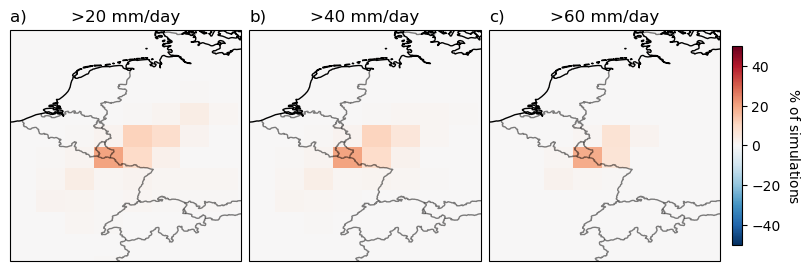

In [7]:
lon = lon_list[0]
lat = lat_list[0]
VAL = [20, 40, 60]
title_label = ['a)', 'b)', 'c)']
val_label = ['>20 mm/day', '>40 mm/day', '>60 mm/day']

fig = plt.figure(figsize=(8,20), layout='constrained')
gs = fig.add_gridspec(1, 3)

for ax, v in enumerate(VAL):
    per_data = np.empty([len(lat_list), len(lon_list)])
    for LON in np.arange(27):
        for LAT in np.arange(17):
            n=0
            for i in np.arange(7):
                for j in np.arange(50):
                    if all_lon[i][j] == lon_list[LON] and all_lat[i][j] == lat_list[LAT]:
                        if all_rain[i][j] > v:
                            n += 1
            per_data[LAT, LON] = n/350
    # Map of probability of rain >40mm
    lats=lat_list
    lons=lon_list
    axs = fig.add_subplot(gs[ax], projection=ccrs.PlateCarree())
    c = axs.pcolormesh(lons, lats, per_data*100, vmin=-50, vmax=50, cmap=plt.cm.get_cmap('RdBu_r'), transform=ccrs.PlateCarree())
    axs.set_ylim([45, 55])
    axs.set_xlim([2,12]) 
    axs.coastlines(resolution='auto', color='k')
    axs.add_feature(cf.BORDERS, linestyle='-', alpha=.5)
    axs.set_title(title_label[ax], loc='left')
    axs.set_title(val_label[ax])

cbar = fig.colorbar(c, shrink=.1)

cbar.set_label('$\%$ of simulations', rotation=270, labelpad =15)
#plt.tight_layout()

In [10]:
# What I think is actually wanted is how many simulation show rain above, not just the location of the central point
R1 = [70, 30, 30, -30] # analog region
date = [2021, 'Jul', 14] # event date

## Inputs
plotdate = '20070825' # '20090829' '20160801'
rain_region = [52, 48, 9, 4]
fields_list = iris.load('/net/pc200023/nobackup/users/thompson/ETHZ/boosted_cubes/tp_20070825.nc')
fields_list.sort(key=lambda cube: cube.coord('startdate').points)

In [33]:
fields_list[8]

<iris 'Cube' of unknown_7 / (m.s-1) (realization: 50; latitude: 42; longitude: 47)>

In [42]:
VAL = 40
per40_data = np.zeros([42, 47])
for EN in np.arange(7,14): # just 12th to 18th start dates (350 members)
    print(EN)
    TP = fields_list[EN]
    temp_data = np.empty([42, 47])
    for i in np.arange(42):
        for j in np.arange(47):
            temp_data[i,j] = sum(x > VAL for x in TP[:,i,j].data)
    per40_data = per40_data + temp_data


7
8
9
10
11
12
13


In [43]:
VAL = 20
per20_data = np.zeros([42, 47])
for EN in np.arange(7,14): # just 12th to 18th start dates (350 members)
    print(EN)
    TP = fields_list[EN]
    temp_data = np.empty([42, 47])
    for i in np.arange(42):
        for j in np.arange(47):
            temp_data[i,j] = sum(x > VAL for x in TP[:,i,j].data)
    per20_data = per20_data + temp_data

7
8
9
10
11
12
13


In [44]:
VAL = 60
per60_data = np.zeros([42, 47])
for EN in np.arange(7,14): # just 12th to 18th start dates (350 members)
    print(EN)
    TP = fields_list[EN]
    temp_data = np.empty([42, 47])
    for i in np.arange(42):
        for j in np.arange(47):
            temp_data[i,j] = sum(x > VAL for x in TP[:,i,j].data)
    per60_data = per60_data + temp_data

7
8
9
10
11
12
13


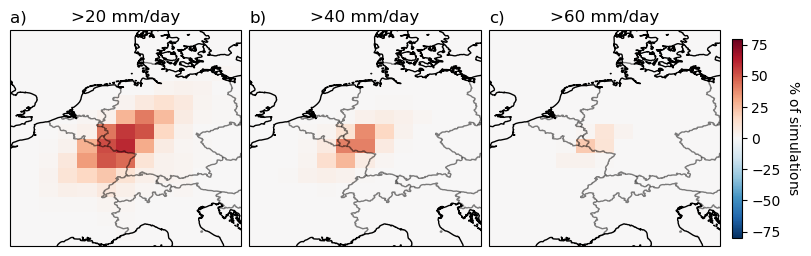

In [49]:

lats=TP.coord('latitude').points
lons=TP.coord('longitude').points

fig = plt.figure(figsize=(8,20), layout='constrained')
gs = fig.add_gridspec(1, 3)

data_array = [per20_data, per40_data, per60_data]
title_label = ['a)', 'b)', 'c)']
val_label = ['>20 mm/day', '>40 mm/day', '>60 mm/day']

for i in np.arange(3):
    axs = fig.add_subplot(gs[i], projection=ccrs.PlateCarree())
    c = axs.pcolormesh(lons, lats, data_array[i]/350*100, vmin=-80, vmax=80, cmap=plt.cm.get_cmap('RdBu_r'), transform=ccrs.PlateCarree())
    axs.coastlines(resolution='auto', color='k')
    axs.add_feature(cf.BORDERS, linestyle='-', alpha=.5)
    axs.set_title(title_label[i], loc='left')
    axs.set_title(val_label[i])    
    axs.set_ylim([43, 57])
    axs.set_xlim([0,15]) 

cbar = fig.colorbar(c, shrink=.1)

cbar.set_label('$\%$ of simulations', rotation=270, labelpad =15)

In [50]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [66]:

def background(ax):
    ax.coastlines(linewidth=0.4)
    #ax.add_feature(cf.BORDERS, lw = 1, alpha = 0.7, ls = "--", zorder = 99)
    gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.2, color='k',alpha=0.5,linestyle='--')
    gl.right_labels = gl.top_labels = False
    gl.xlabel_style = {'size': 5, 'color': 'gray'}
    gl.ylabel_style = {'size': 5, 'color': 'gray'}
    ax.grid(color='lightgrey')


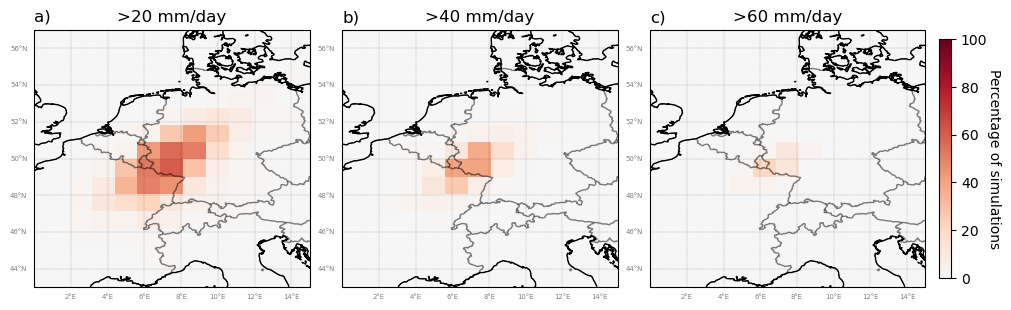

In [70]:
cm_t = truncate_colormap(plt.get_cmap("RdBu_r"), 0.5, 1)

lats=TP.coord('latitude').points
lons=TP.coord('longitude').points

fig = plt.figure(figsize=(10,20), layout='constrained')
gs = fig.add_gridspec(1, 3)

data_array = [per20_data, per40_data, per60_data]
title_label = ['a)', 'b)', 'c)']
val_label = ['>20 mm/day', '>40 mm/day', '>60 mm/day']

for i in np.arange(3):
    axs = fig.add_subplot(gs[i], projection=ccrs.PlateCarree())
    c = axs.pcolormesh(lons, lats, data_array[i]/350*100, vmin=0, vmax=100, cmap=cm_t, transform=ccrs.PlateCarree())
    axs.coastlines(resolution='auto', color='k')
    axs.add_feature(cf.BORDERS, linestyle='-', alpha=.5)
    axs.set_title(title_label[i], loc='left')
    axs.set_title(val_label[i])   
    background(axs) 
    axs.set_ylim([43, 57])
    axs.set_xlim([0,15]) 

cbar = fig.colorbar(c, shrink=.12)

cbar.set_label('Percentage of simulations', rotation=270, labelpad =10)